<h1 align = "center" > Hearth Attack Analysis And Prediction Update </h1>

### Table Content
1. [Introduction](#1)
    * 1.1 [Examining The Project Topic](#2)
    * 1.2 [Recognizing Variables in The Dataset](#3)
2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)
    * 2.2 [Loading The Dataset](#7)
    * 2.3 [Initial Analysis On The Dataset](#8)
        * 2.3.1 [Analysis Outputs(1)](#9)
3. [Preparation for Exploratory Data Analysis(EDA)](#10)
    * 3.1 [Examining Missing Values](#11)
    * 3.2 [Examining Unique Values](#12)
        * 3.2.1 [Analysis Outputs(2)](#13)
    * 3.3 [Separating variables(Numeric or Categorical)](#14)
    * 3.4 [Examining Statistics of Variables](#18)
        * 3.4.1 [Analysis Output(3)](#19)
4. [Exploratory Data Analysis(EDA)](#15)
     * 4.1 [Uni-Variate Analysis](#16)
         * 4.1.1 [Numerical Variables(Analysis With Distplot)](#17)
             * 4.1.1.1 [Analysis Output(4)](#20)
         * 4.1.2 [Categorical Variable(Analysis with <b> Pie Chart</b>)](#21)
             * 4.1.2.1 [Analysis Output(5)](#22) 
             * 4.1.2.2 [Examining The Missing Data According to The Analysis Result](#23)
     * 4.2 [Bi-Variate Analysis](#24)
         * 4.2.1 [Numerical variables -Target variable(Analysis with FaceGrid)](#25)
         * 4.2.2 [Categorical Variables - Target variable(Analysis with Count Plot)](#26)
         * 4.2.3 [Examining Numerical Variables Among Themselves(Analysis with Pair Plot)](#27)
         * 4.2.4 [Feature Scaling with The RebustScaler Method](#28)
         * 4.2.5 [Creating a New DataFrame Using the Melt() Function](#29)
         * 4.2.6 [Numerical Variables - Categorical Variables()Analysis with <b>SwarmPlot</b>](#30)

### 1. Introduction <a id =1></a>

#### 1.1 Examining the Project Topic <a id = 2></a>

#### What is Heart Attack?<br><br>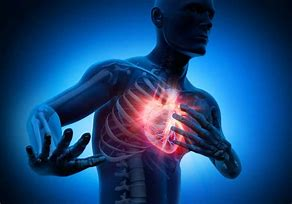

* Cardiovascular event.
* Occurs due to blockage of blood flow to the heart.
* Symptoms include chest pain, shortness of breath, and nausea.
* Can result in permanent damage to the heart muscle.
* Prompt medical intervention is critical for survival.

#### How Does it Occur?

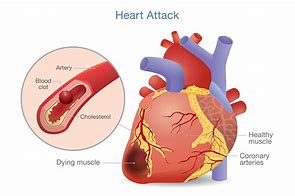

* Formation of plaque in coronary arteries.
* Plaque rupture leads to blood clot formation.
* Blood clot blocks blood flow in coronary artery.
* Reduced or blocked blood flow deprives heart muscle of oxygen.
* Resulting tissue damage or cell death manifests as a heart attack.

#### What are the symptoms of heart Attack?

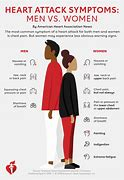

#### 1.2 Recognizing Variables In The Dataset <a id=3></a>

* age - Age of the person.
* sex - Gender of the person.
* cp - Chest Pain type chest pain type.
* trtbps - resting blood pressure (in mm Hg).
* chol - cholestoral in mg/dl fetched via BMI sensor.
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
* restecg - resting electrocardiographic results.
* thalach - maximum heart rate achieved.
* exang - exercise induced angina (1 = yes; 0 = no).
* oldpeak - Previous peak.
* slope - Slope.
* ca - number of major vessels (0-3).
* thal - Thal rate.
* target - Target variable.

### 2. First Organization <a id =4></a>

#### 2.1 Rquired Python Libraries <a id=5></a>

#### 2.1.1 Basic Libraries <a id =6></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


#### Loading The Dataset <a id =7></a>

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Initial Analysis On The Dataset <a id =8></a>

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Some of the variable names differs fromt the name in the Description
# We are gonna change the names to the previous name we learned by creating a new col.
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [6]:
df.columns = new_columns

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Study the table
# Each row represents only one patient

In [9]:
# Lets Find the shape of the data
print("shape of Dataset:", df.shape)

shape of Dataset: (303, 14)


In [10]:
# Gettting to know some information on the dataset
df.info()
# All variables are in numerical, if not convert to numeric.
# If there's a variable that is of Object type and isn't supposed to be.. Clear the variable and change to the relevant type.
# Or we can have a preference to remove the missing values and should be the last choice.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# check if there's a missing values in all variables
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Analysis Outputs(1)<a id =9></a>

* The Dataset consists of 303 Rows and 14 Columns.
* The type of all the variables in the data set are in numerical format.(integer or float).
* According to first impressions, there is no missing values(NaN Value) in the dataset.

#### 3. Preparation for Exploratory Data Analysis(EDA)<a id = 10></a>

#### 3.1 Examining Missing Values <a id=11></a>

In [12]:
# Any missing data will create distortion in visualization
# It will cause the model to have a low accuracy.
# Appropraite values are replaced for the missing values.

In [13]:
df.isnull().sum()
# Still there's no missing values in the dataset

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# Looping through all variables in the dataset in other and find missing values.
# Call the variables of the dataset using the 
# This code fetches missing data from the whole dataframe.
# It saves the values to the x and append it to the isnull_number.
# Creates a dataFrame of the missing values.
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing values"])

,Total Missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

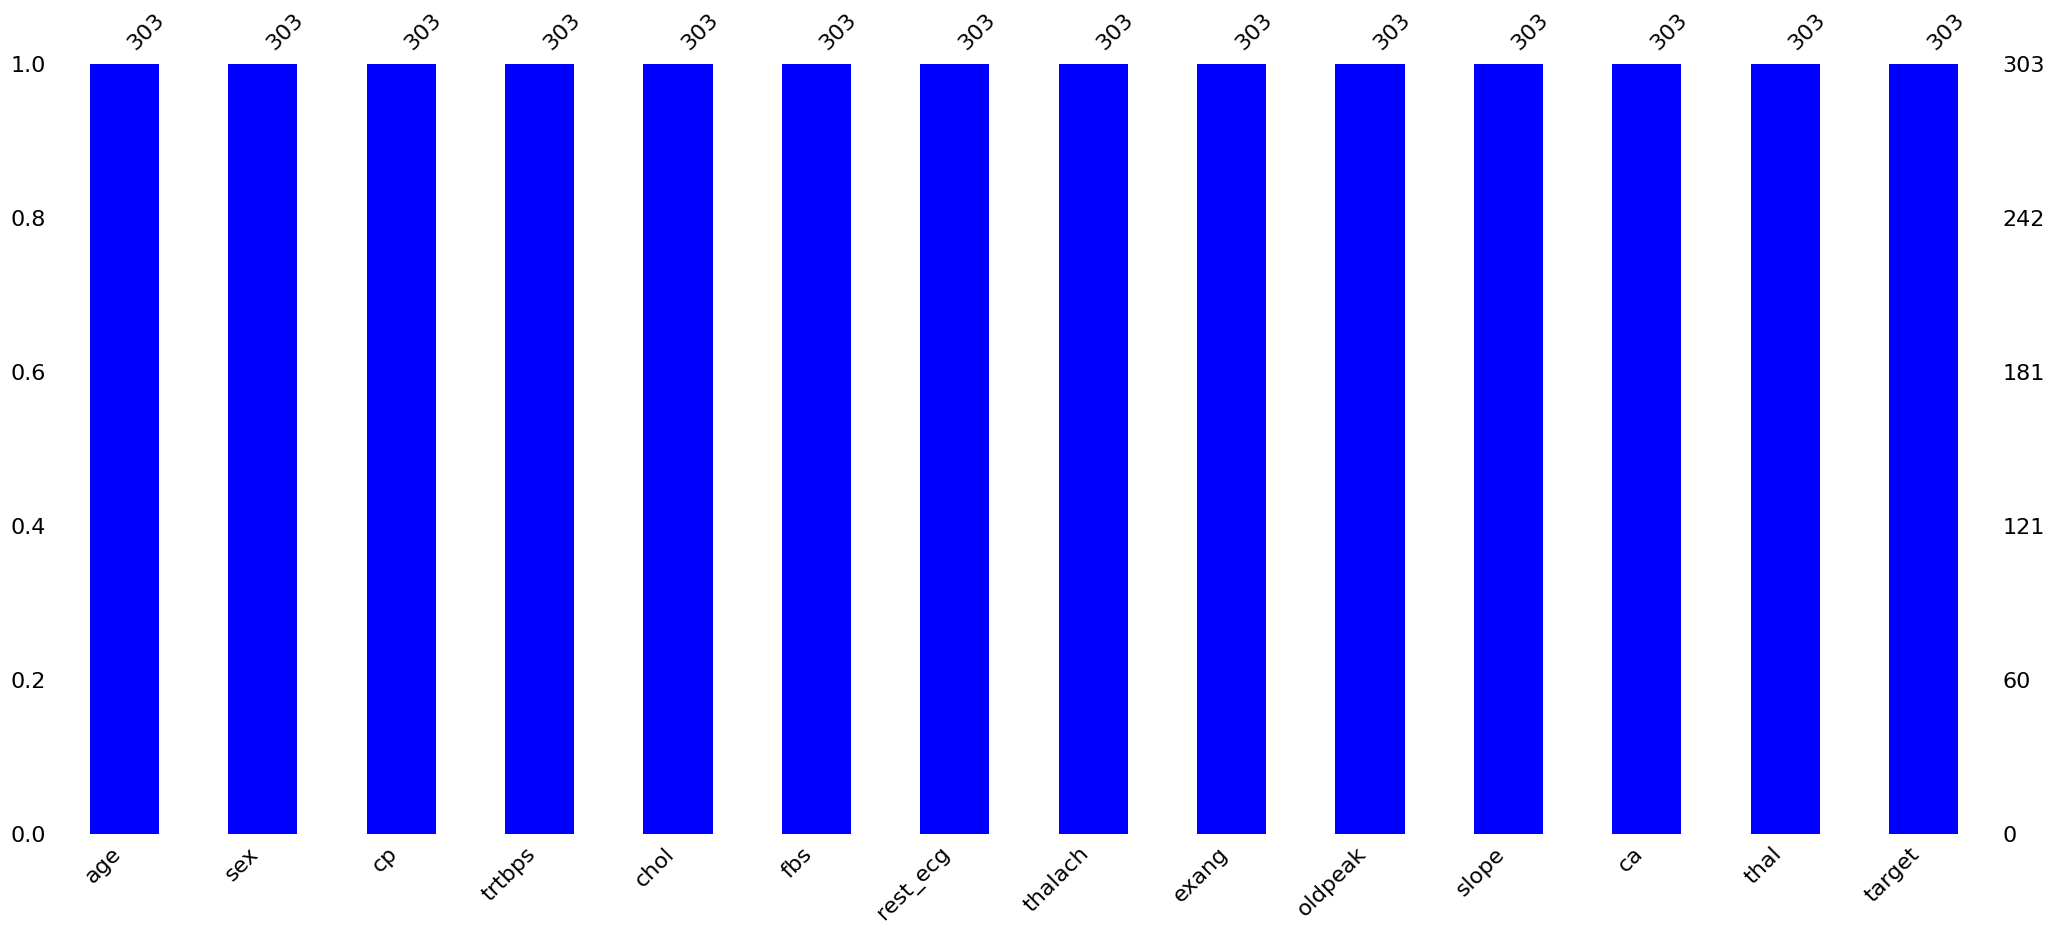

In [15]:
# Visualizen the missing data using the missingno library
import missingno
missingno.bar(df, color="b")

#### 3.2 Examining Unique Values <a id=12></a>

In [16]:
# Observation values that are not the similar to each other in the variables
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [18]:
df["cp"].value_counts().sum()

303

In [19]:
# Total unique values of the variable
df["cp"].value_counts().count()

4

In [20]:
unique_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    unique_number.append(x)
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique values"])

,Total Unique values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


#### 3.2.1 Analysis Output 2<a id=13></a>

* <b>According to the result from the  unique dataframe:</b> 
* We determine the variables with few unique values as categorical variables, and the variables with high unique values as numeric variables.
* In this content,<b> Numeric Varibles </b>"age", "trtps", "chol", and "oldpeak"
* <b>Categorical Variables</b> "sex", "cp", "fbs","rest_ecg","exang","slope","ca","thal","target".
* In the next session we will separate these 2 groups into 2 different lists.

#### 3.3 Separating variables(Numeric or Categorical) <a id = 14></a>

In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 3.4 Examining Statistics of Variables<a id= 18></a>

In [22]:
# Examining basic statistical variables we have.
numeric_var = ["age", "trtbps","chol","thalach","oldpeak"]
categorical_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [23]:
# Describe method, remove the missing values in the dataset
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


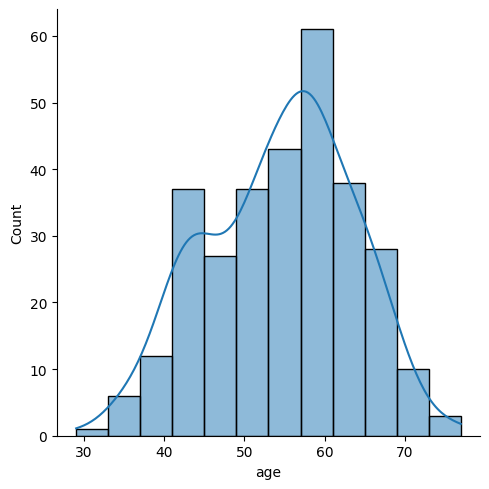

In [24]:
sns.displot(df["age"],kde =True, **dict(linewidth=1, edgecolor="k"))


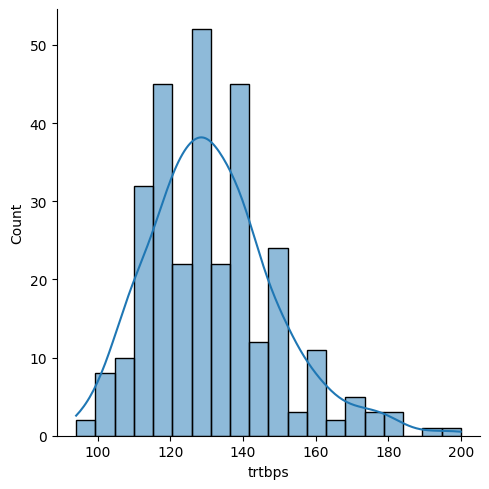

In [25]:
sns.displot(df["trtbps"],kde =True, **dict(linewidth=1, edgecolor="k"), bins =20);

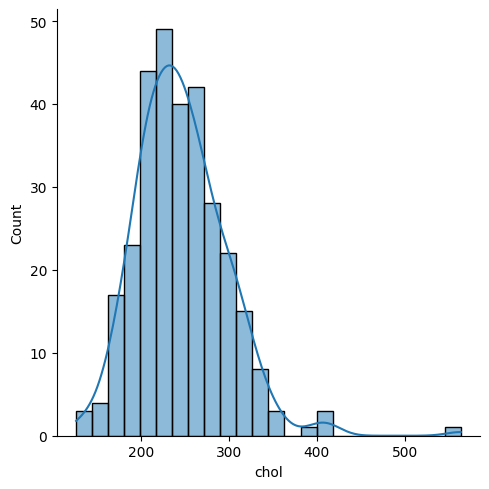

In [26]:
sns.displot(df["chol"], kde = True)

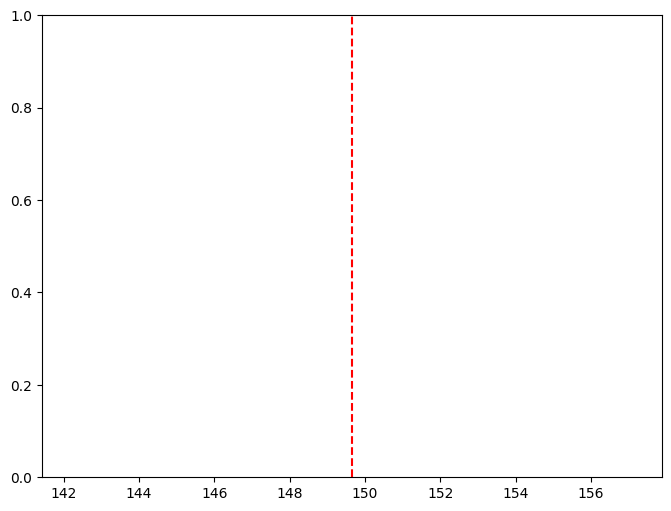

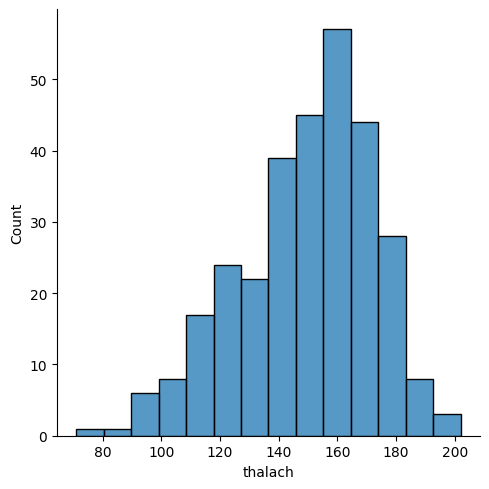

In [27]:
# MArking the exact location of the mean on the axis
x, y =plt.subplots(figsize = (8,6))
sns.displot(df["thalach"], ax = y)
y.axvline(df["thalach"].mean(), color ="r", ls ="--");

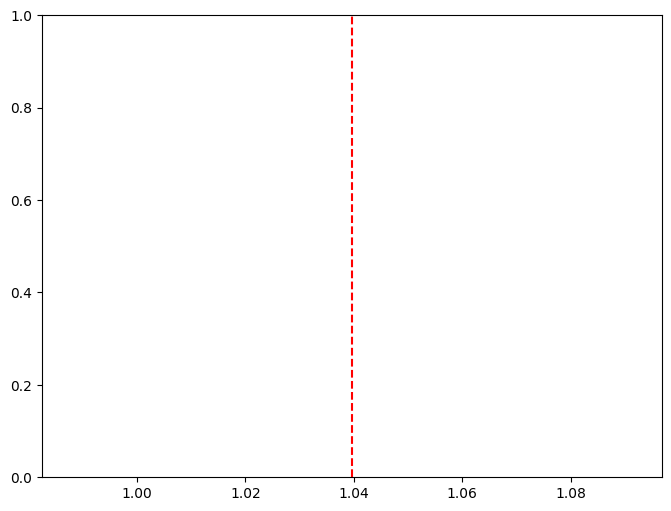

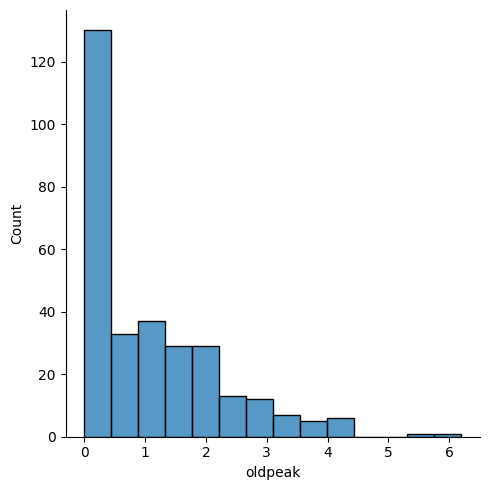

In [28]:
# Examining the last variable
x, y =plt.subplots(figsize = (8,6))
sns.displot(df["oldpeak"], ax = y)
y.axvline(df["oldpeak"].mean(), color ="r", ls ="--");

#### 3.4.1 Analysis Output(3)<a id=19></a>

* Separate Data into Numeric and Categorical

In [29]:
numeric_var = ["age", "trtbps","chol","thalach","oldpeak"]
categorical_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

#### 4. Exploratory Data Analysis(EDA)<a id = 15></a>

##### Using visuals to determine the characteristic of variable

#### 4.1 Uni-variate Analysis<a id = 16></a>
#### 4.1.1 Numerical variables(Analysis With Displot)<a id = 17></a>

In [30]:
# Visuals for the Numeric variables
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [31]:
numeric_axis_name = ["Age of the  Patient","Resting Blood Pressure","Cholestrol","Maximum Heart Rate Achieved","ST Depression"]

In [32]:
# creating a list for the specific Titles.
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the  Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholestrol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

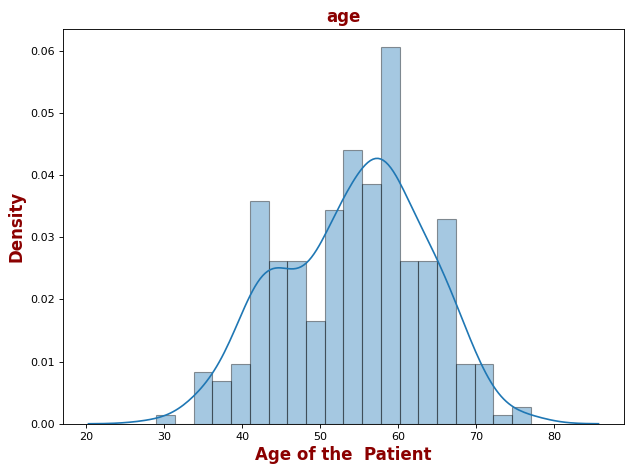

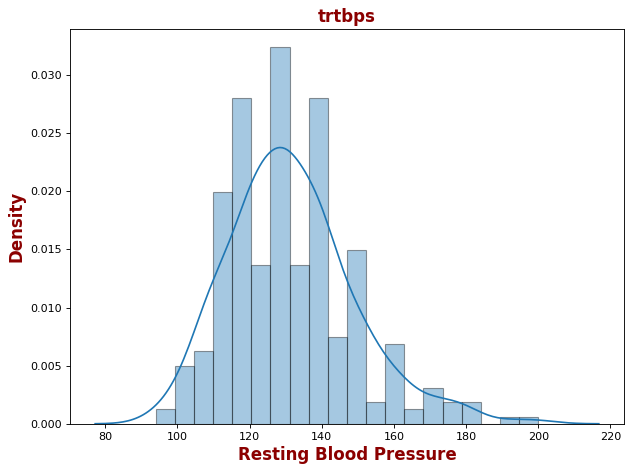

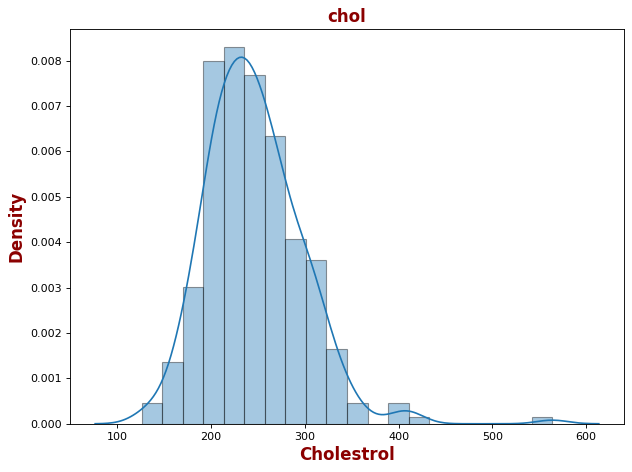

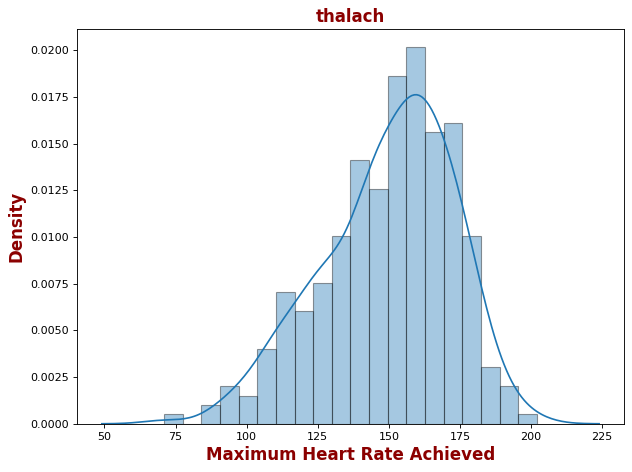

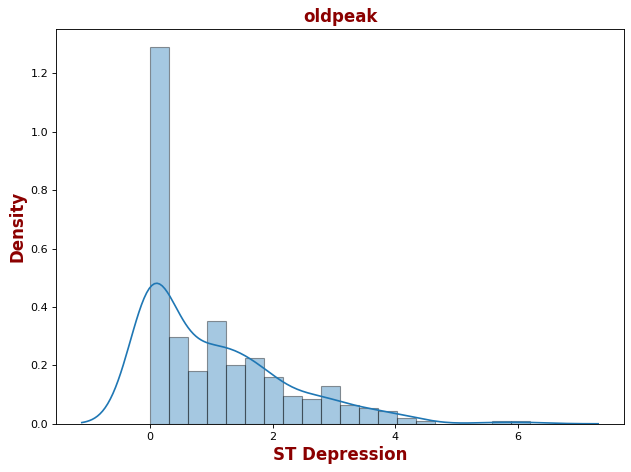

In [33]:
# set up a forloop to plot the visual for each variable, instead of doing them seperately
# Using displot for the visualization.


# Creating a dictionary for the font style for the title and axis.
title_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}
axis_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}



for i, z in list(zip(numeric_var, numeric_axis_name)):# z is for fecthing the variables for the title.
    plt.figure(figsize=(8,6), dpi = 80)
    sns.distplot(df[i], hist_kws =dict(linewidth=1, edgecolor = "k"), bins =20);
    
    
    plt.title(i, fontdict= title_font) #----> title function to chage the apperance
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font) # Y_label show be the density istead of i for the actual column(variable)
    
#   images should not contact each other
    plt.tight_layout()
    plt.show()
    
#   X-axis will have the same name as the title

#### 4.1.1.1 Analysis Output(4)<a id=20></a>

#### 4.1.2 Categorical Variable(Analysis with <b>Pie Chart</b>) <a id = 21></a>

In [34]:
categorical_var 

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [35]:
# Examine the visual of each varaible
# Bar chart or pie chart can be used but we are gonna use pie Chart


categoric_axis_name = ["Gender","Chest Pain Type", "Fasting Blood Sugar"," Resting Electrocardiographic Results",
                      "Exercise Induced Angina","The Slope of ST Segment","Number of Major Vessels","Thal","Target"]

In [36]:
categoric_axis_name

['Gender',
 'Chest Pain Type',
 'Fasting Blood Sugar',
 ' Resting Electrocardiographic Results',
 'Exercise Induced Angina',
 'The Slope of ST Segment',
 'Number of Major Vessels',
 'Thal',
 'Target']

In [37]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [38]:
# We have to create a list for the value at the left and the right separately
# for the Right
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [39]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

In [40]:
list(zip(categorical_var,categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', ' Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

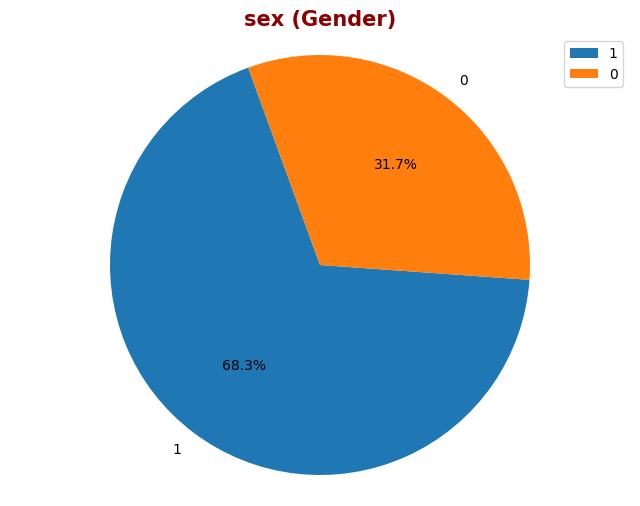

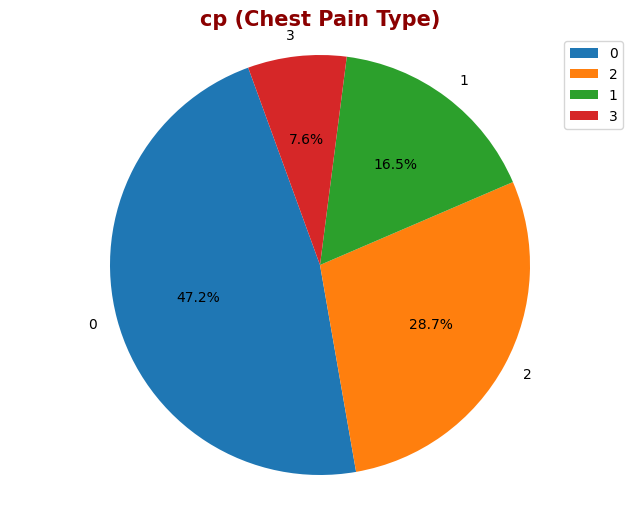

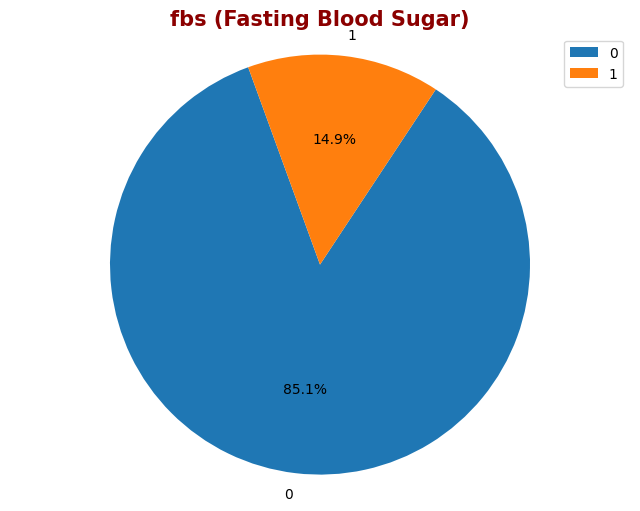

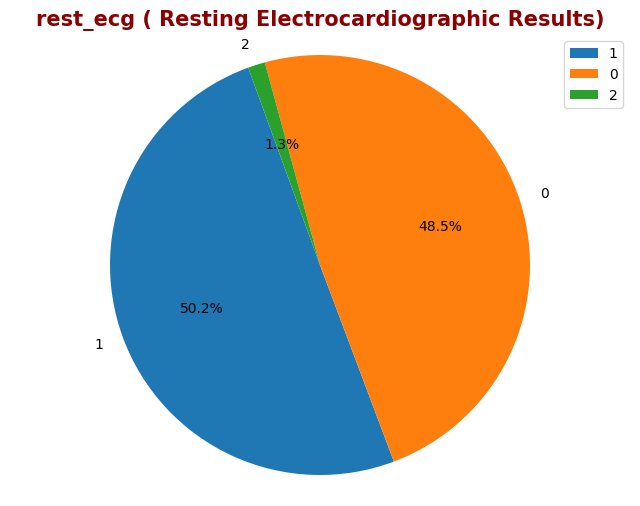

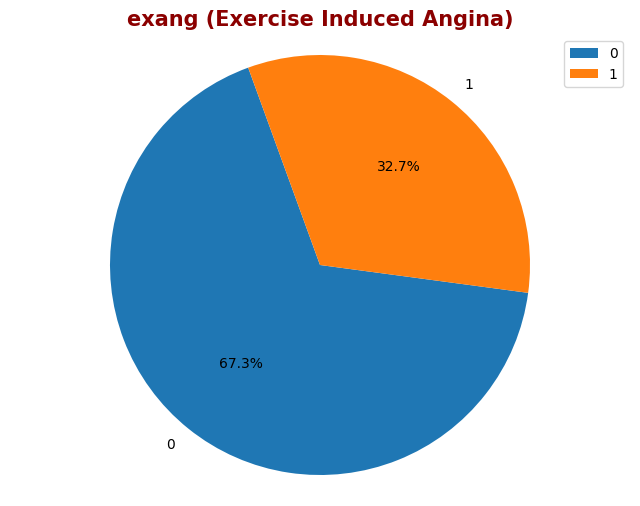

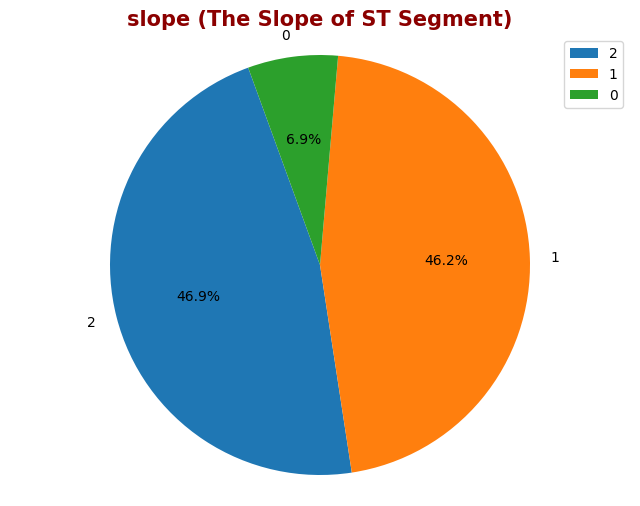

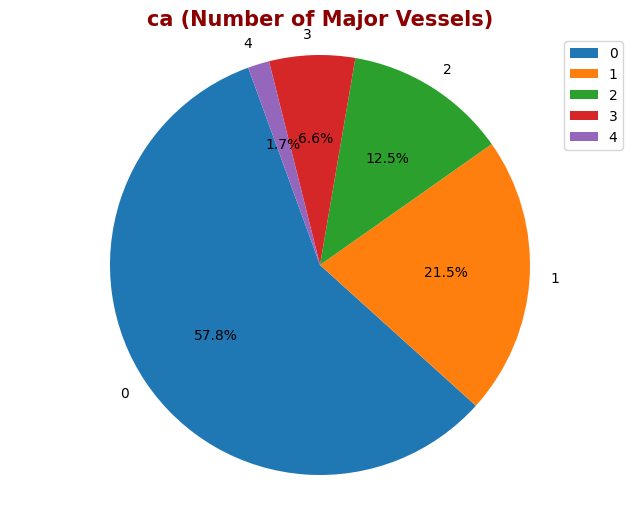

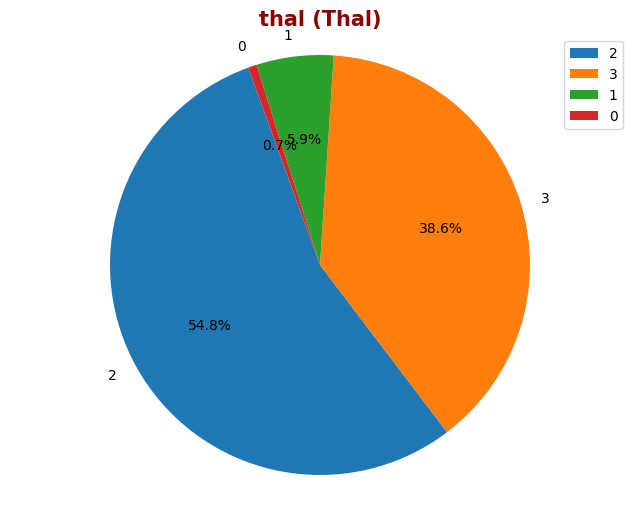

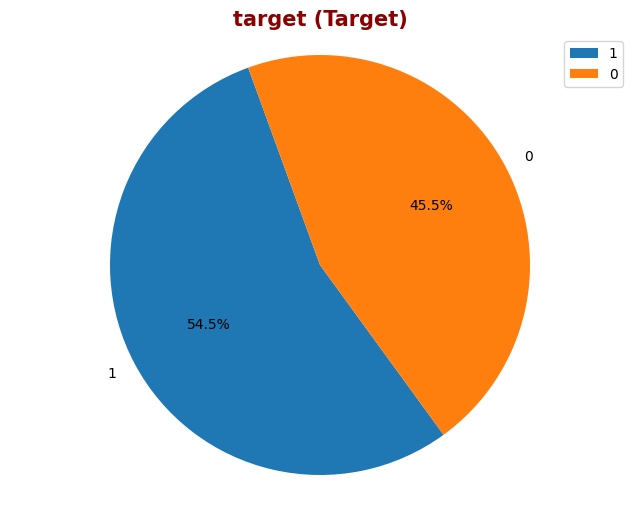

In [41]:
# Creating dict for the font
title_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}
axis_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}

for i,z in list(zip(categorical_var,categoric_axis_name)): # The binary structures of the list will loop anytime everytime the loop starts.
    fig, ax = plt.subplots(figsize = (8,6))
#  what we will do with the values in the body of the for loop.
    
#  Create two variables for the list above(Left and Right)
    observation_values = list(df[i].value_counts().index) # assigning obervations to a var.
    total_observation_values = list(df[i].value_counts()) #total observations
    
    ax.pie(total_observation_values, labels =observation_values, autopct = '%1.1f%%', startangle =110, labeldistance = 1.1)
    ax.axis("equal") # Creates equal aspect ratio
    
    
#   Creating the titles
    plt.title(i + " (" + z + ")", fontdict=title_font)
    plt.legend()
    plt.show()

#### 4.1.2.1 Analysis Output(5) <a id =22></a>

#### 4.1.2.2 Examining The Missing Data According to The Analysis Result<a id =23></a>

In [42]:
# Gonna remove missing values and fill in with data that make sense.
# Finding the values that are 0 in the "thal" varibable
df[df["thal"]==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


#### Two of the values are zero, hence we gonna replace them instead of deleting

In [43]:
df["thal"]=df["thal"].replace(0, np.nan)

In [44]:
# Checking for the columns of the victim variable
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [45]:
# Has to check for the missing values again
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing values"])

,Total Missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


#### You can use variance method when filling missing data in a categorical varaible

#### Most used method is filling missin

In [46]:
# From here, check for the maximum observation value in the variable
#  Replace with the missing values
# in this case 2 for the "thal" variable
df["thal"] = pd.to_numeric(df["thal"], downcast="integer")

In [47]:
# Checking the unique values in the variable
df["thal"].value_counts()

thal
2.0    166
3.0    117
1.0     18
Name: count, dtype: int64

#### 4.2 Bi-Variate Analysis<a id=24></a>

#### 4.2.1 Numerical variables -Target variable(Analysis with FaceGrid)<a id=25></a>

In [48]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [49]:
# add the target variable to the numeric variables.
numeric_var.append("target")

In [50]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

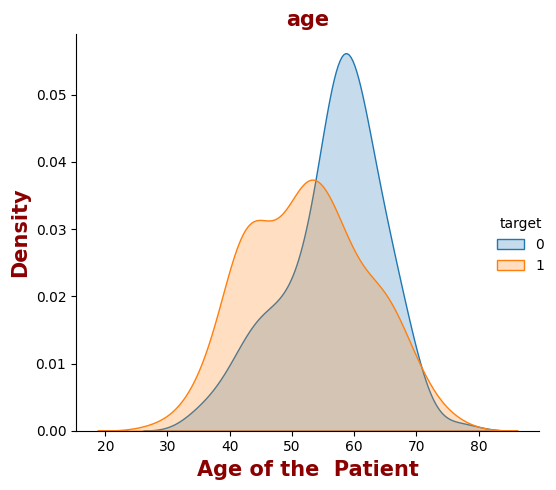

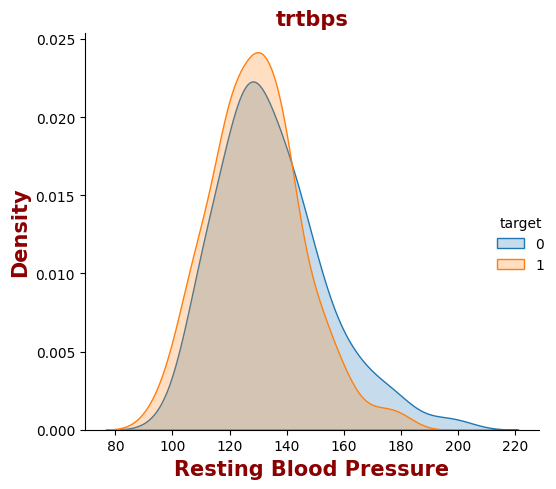

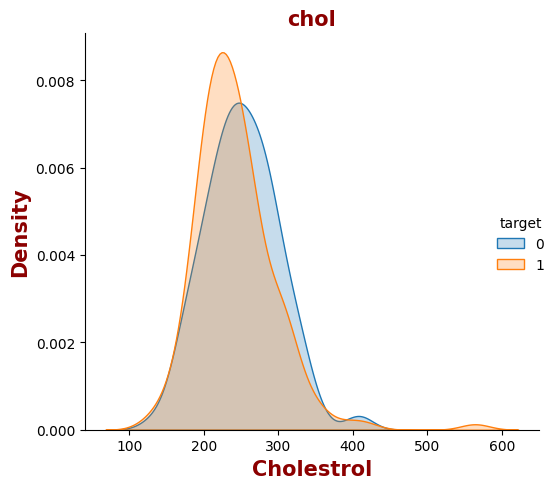

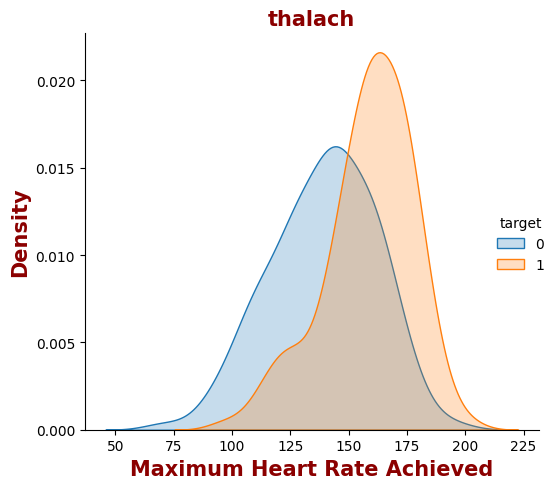

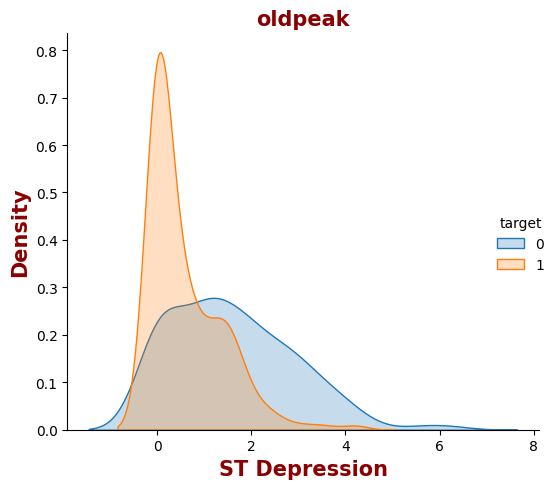

In [51]:
# Analyzing each variable with the target variable using visaulization
# Creating a dictionary for the font style for the title and axis.
title_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}
axis_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}



for i, z in list(zip(numeric_var, numeric_axis_name)):# z is for fecthing the variables for the title.
    graph = sns.FacetGrid(df[numeric_var], hue="target",height=5, xlim=None, ylim=None)
    graph.map(sns.kdeplot, i, shade=True)
    graph.add_legend()                    
                         
                         
    plt.title(i, fontdict= title_font) #----> title function to chage the apperance
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font) # Y_label show be the density istead of i for the actual column(variable)
    
#   images should not contact each other
    plt.tight_layout()
    plt.show()
    

#### * 4.2.2 Categorical Variables - Target variable(Analysis with Count Plot)<a id =26></a>

In [52]:
categorical_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [53]:
categorical_var.append("target")

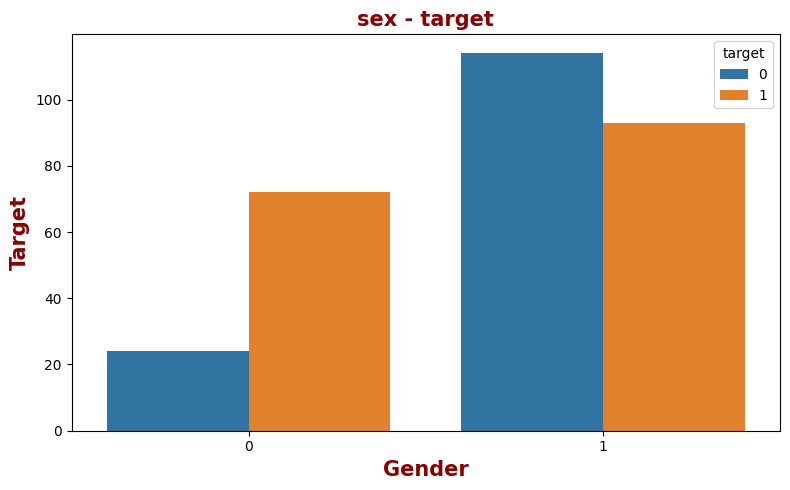

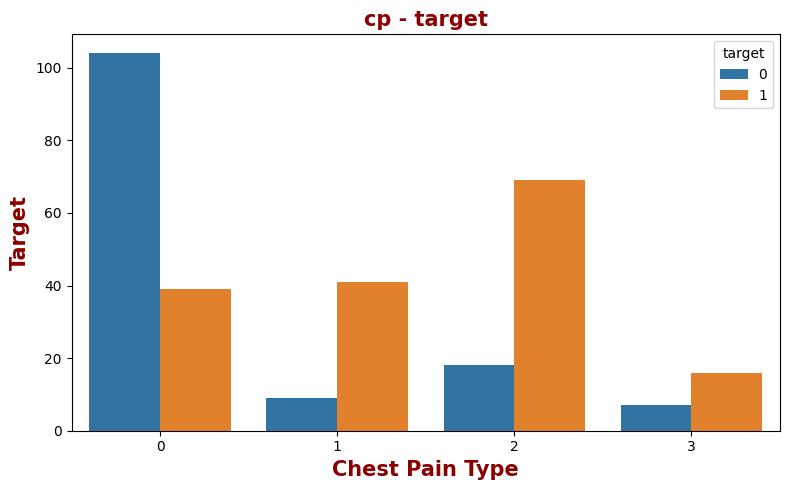

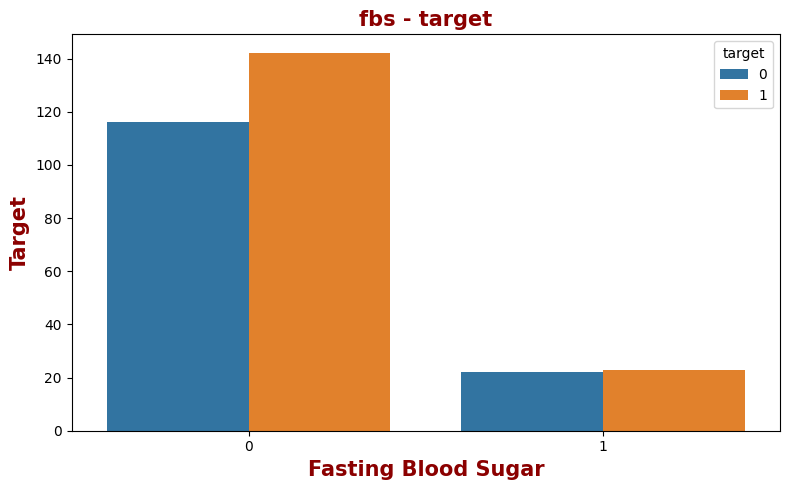

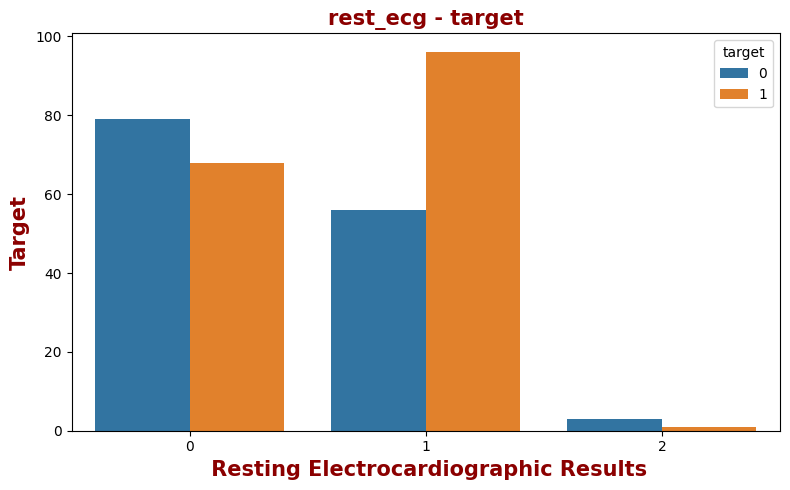

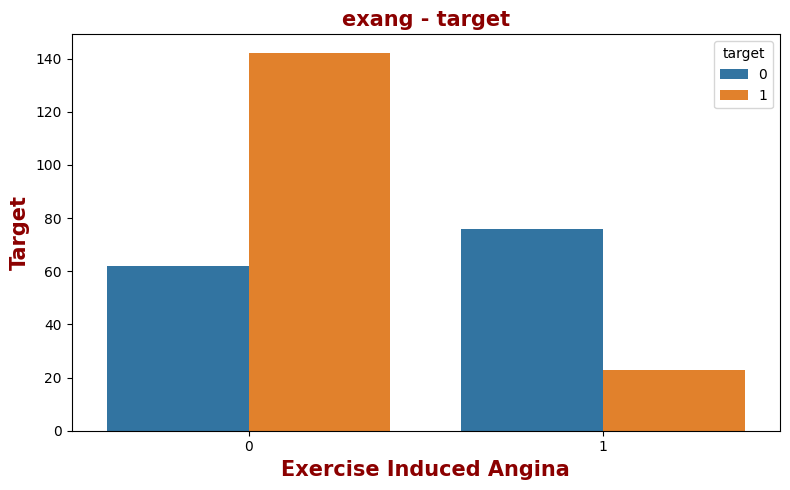

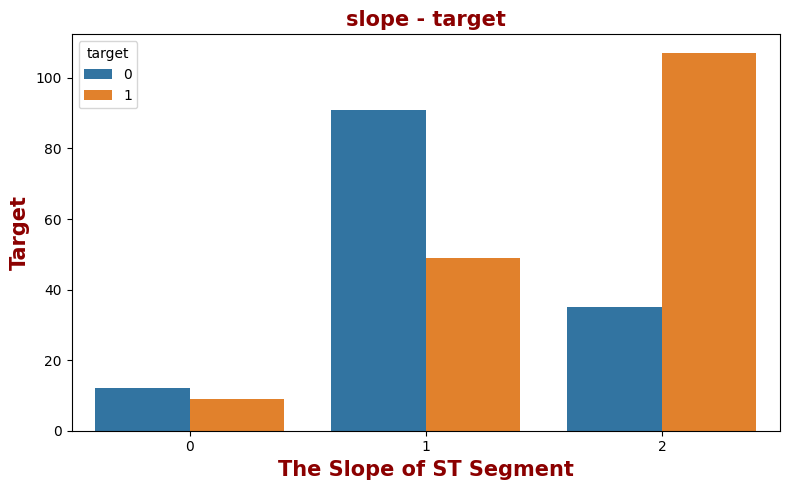

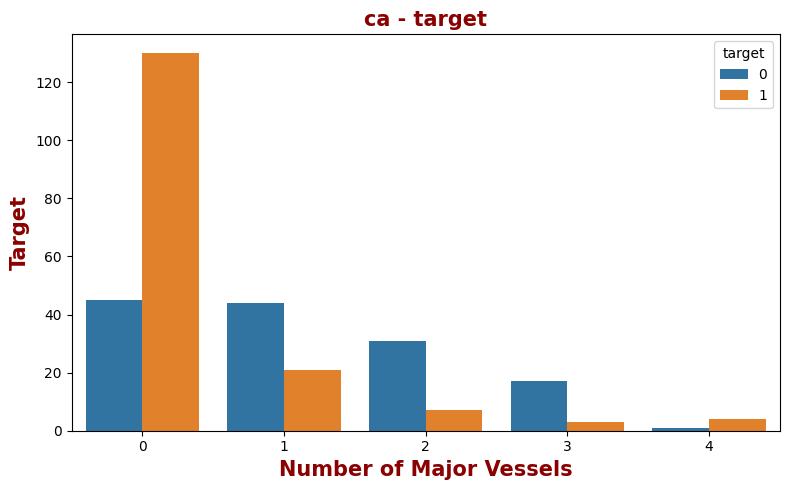

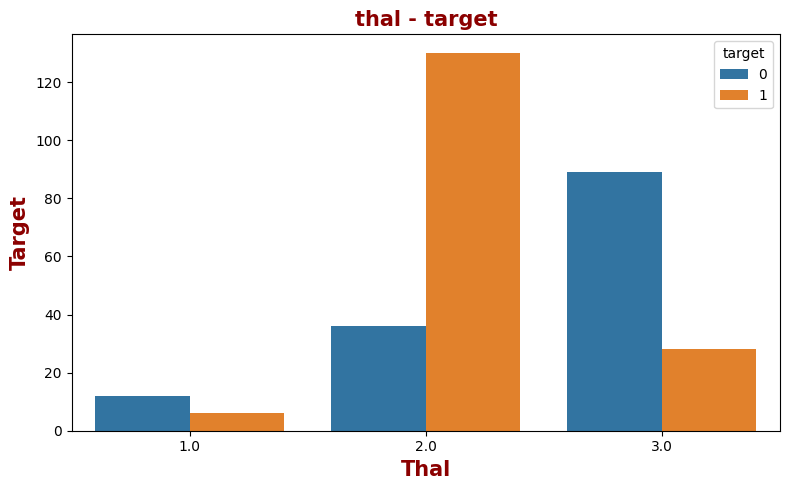

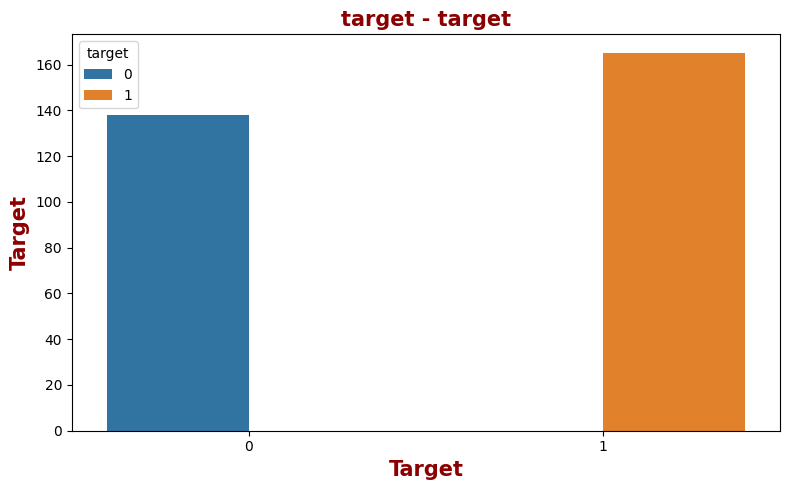

In [54]:
# Examining the relationship of all the categorical varibles with the target variable.
title_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}
axis_font = {"family":"arial", "color":"darkred", "weight":"bold", "size": 15}



for i, z in list(zip(categorical_var,categoric_axis_name)):# z is for fecthing the variables for the title.
    plt.figure(figsize = (8,5))
    sns.countplot(x=i, data = df, hue="target")
    
                         
                         
    plt.title(i + " - target", fontdict= title_font) #----> title function to chage the apperance
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font) # Y_label show be the density istead of i for the actual column(variable)
    
#   images should not contact each other
    plt.tight_layout()
    plt.show()
    

In [55]:
df[categorical_var].corr().iloc[:, [-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.365264
target,1.000000
target,1.000000


#### 4.2.3 Examining Numerical Variables Among Themselves(Analysis with Pair Plot) <a id =27></a>

In [56]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [57]:
numeric_var.remove("target")

In [58]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


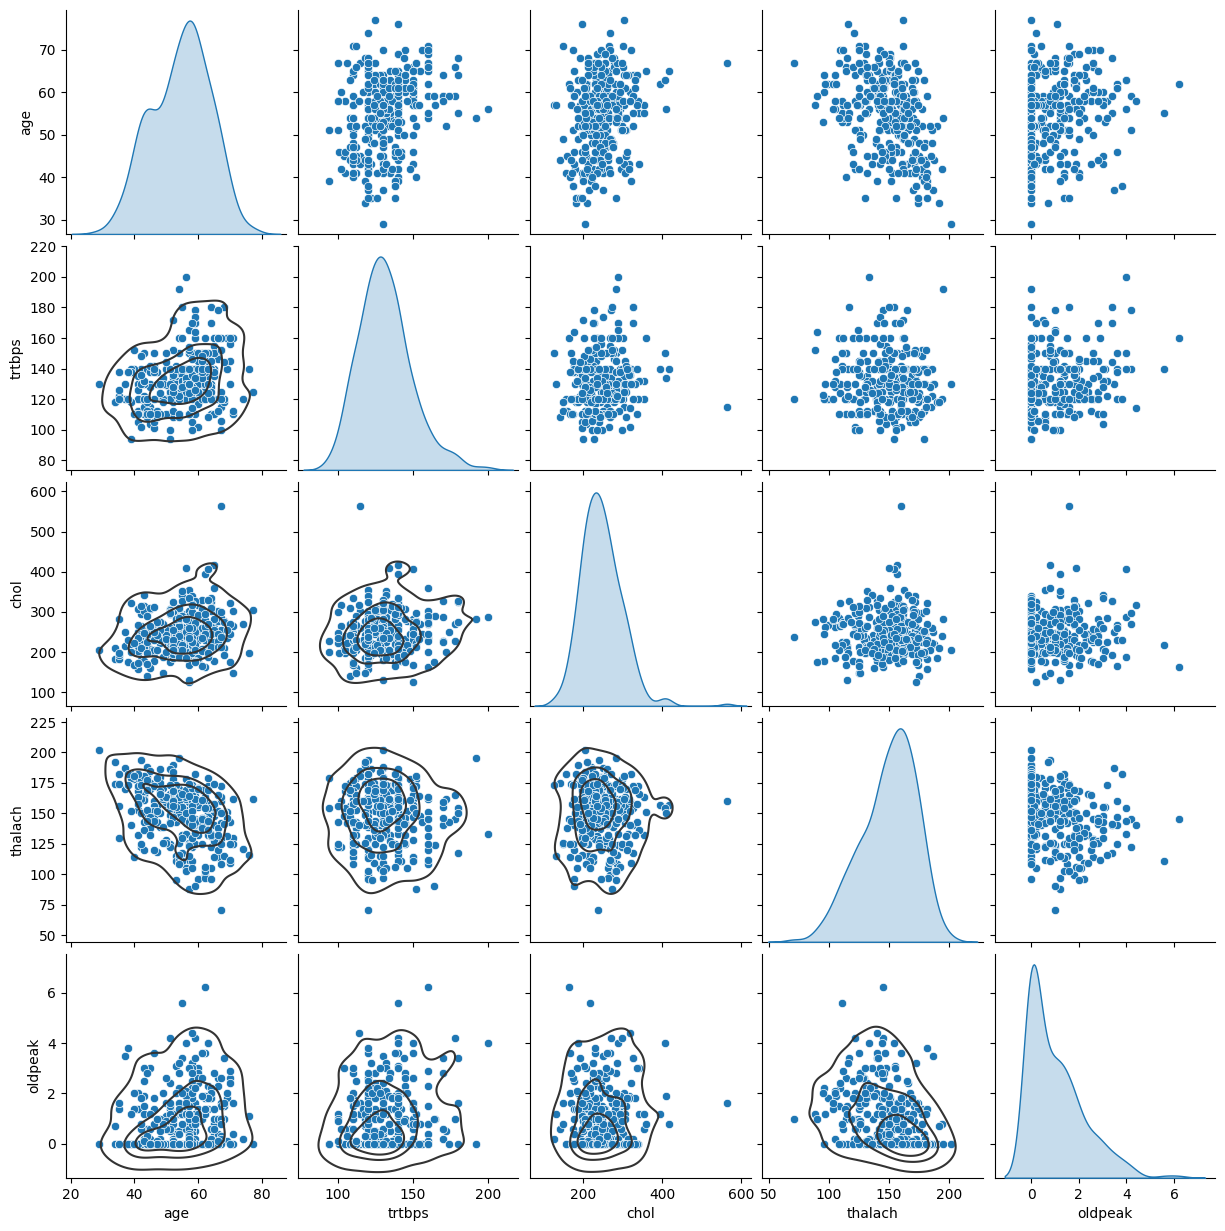

In [59]:
# analysing the numeric variables with pairplot
# Scatterplot uses catesian coordinates
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color=".2")
plt.show()

#### * 4.2.4 Feature Scaling with The RobustScaler Method <a id =28></a>

####  Understanding RobustScaler:
Robust to Outliers: Unlike standard scaling methods like MinMaxScaler or StandardScaler, which use the mean and standard deviation, RobustScaler uses median and quartiles, making it robust to outliers. Outliers can heavily influence the mean and standard deviation, leading to poor scaling performance, but they have less effect on the median and quartiles.

In [60]:
from sklearn.preprocessing import RobustScaler

In [61]:
robust_scaler = RobustScaler()

In [62]:
# Transforming the numeric varible with Robust function
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [63]:
type(scaled_data)

numpy.ndarray

In [64]:
# converting the scaled data into a dataframe
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


##### The values in the dataframe has been scaled to a more appropriate range. The distances of the data to each other were scaled to a preferred range.

#### 4.2.5 Creating a New DataFrame Using the Melt() Function <a id = 29></a>

##### What is melt()?
The melt() function in pandas is used to transform or reshape a DataFrame from a wide format to a long format. It essentially unpivots the DataFrame, converting columns into rows.

In [65]:
# Adding the target variable to the scaled data
df_new = pd.concat([df_scaled, df.loc[:,"target"]], axis =1)

In [66]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [67]:
#  Changing the structure of the dataframe using the Melt() Function
melted_data = pd.melt(df_new, id_vars = "target", var_name = "variables",value_name = "value")

In [68]:
melted_data

,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


#### Visualization with swarmplot
#####  It is used to visualize the distribution of a continuous variable within different categories, similar to a stripplot, but it ensures that points do not overlap.

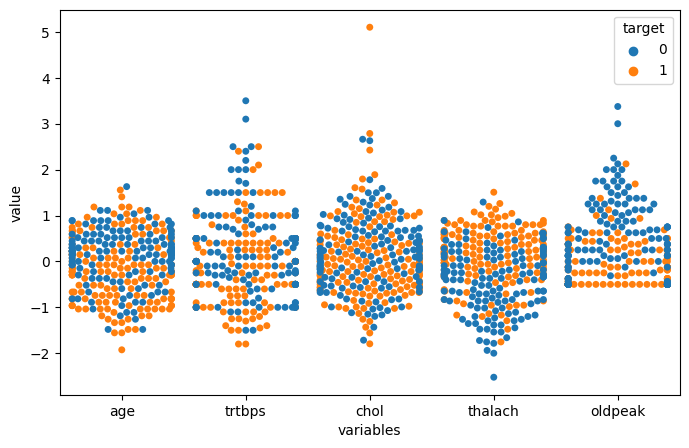

In [69]:
# Visualization using the swanplot
plt.figure(figsize = (8, 5))
sns.swarmplot(x = "variables", y = "value",hue = "target", data = melted_data)
plt.show()

#### 4.2.6 Numerical Variables - Categorical Variables()Analysis with <b>SwarmPlot</b><a id =30></a>

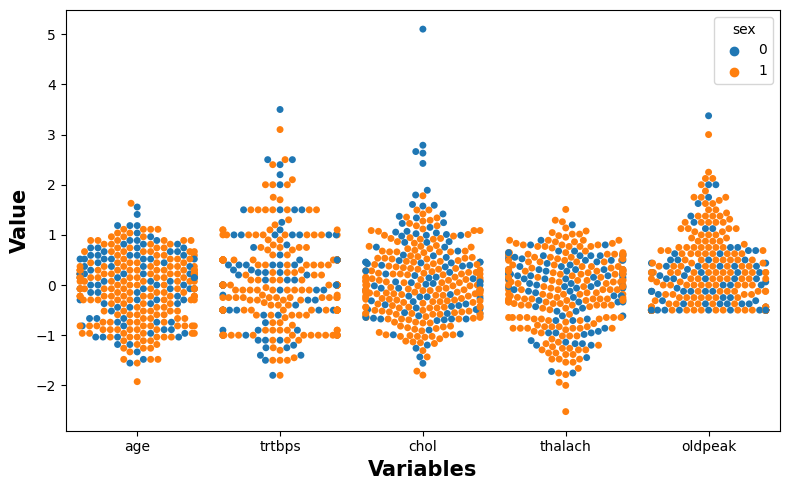

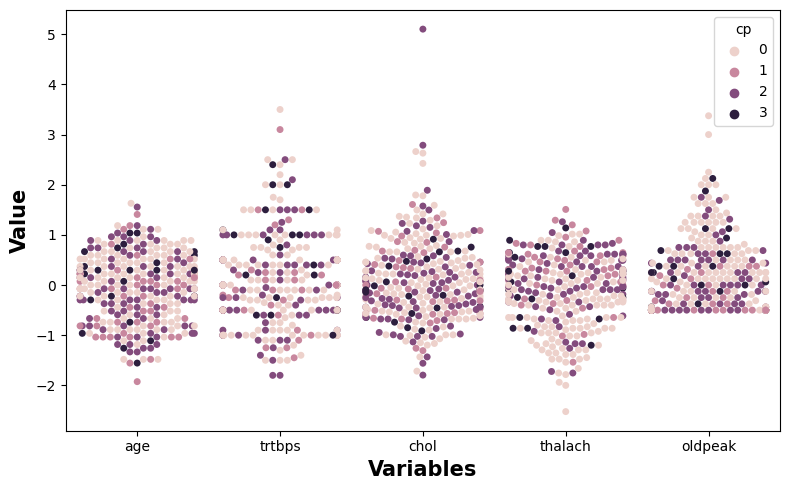

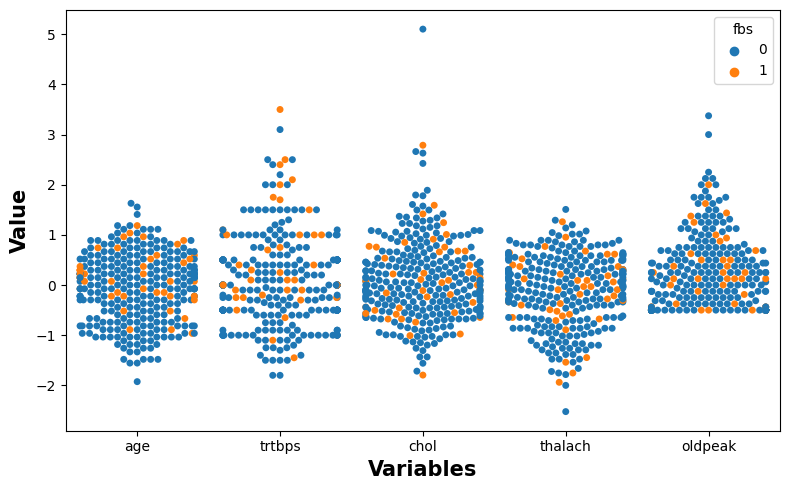

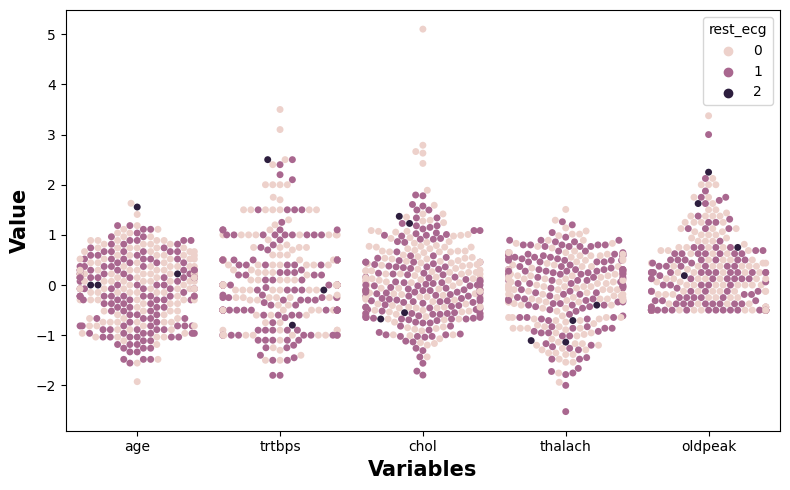

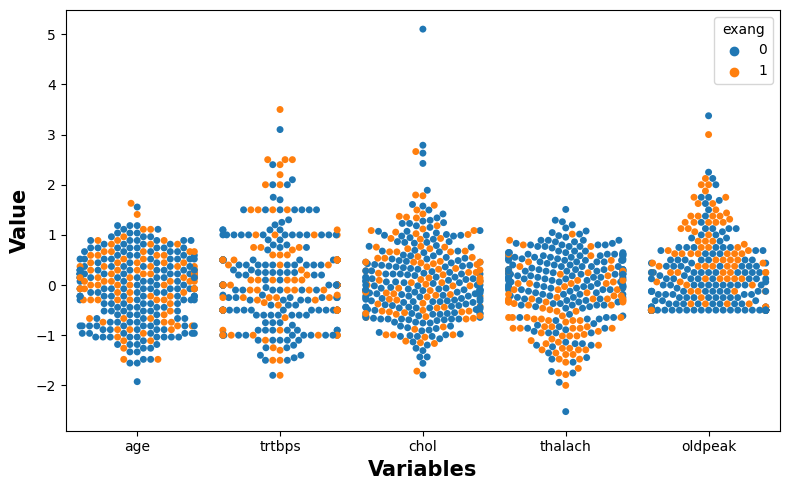

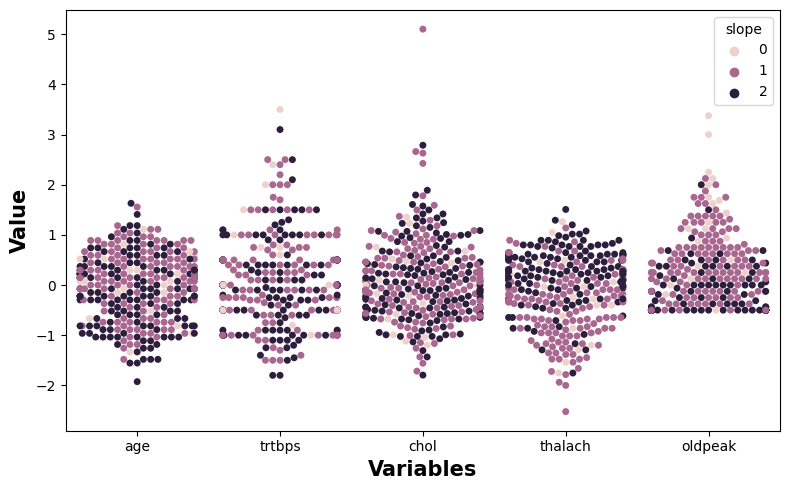

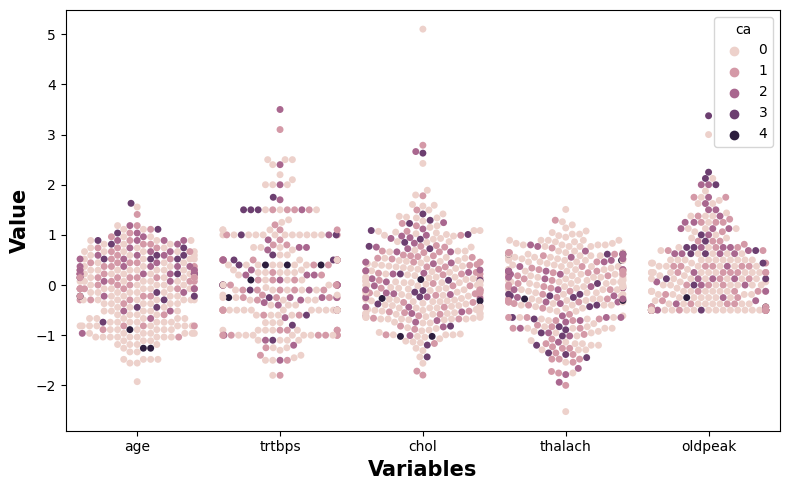

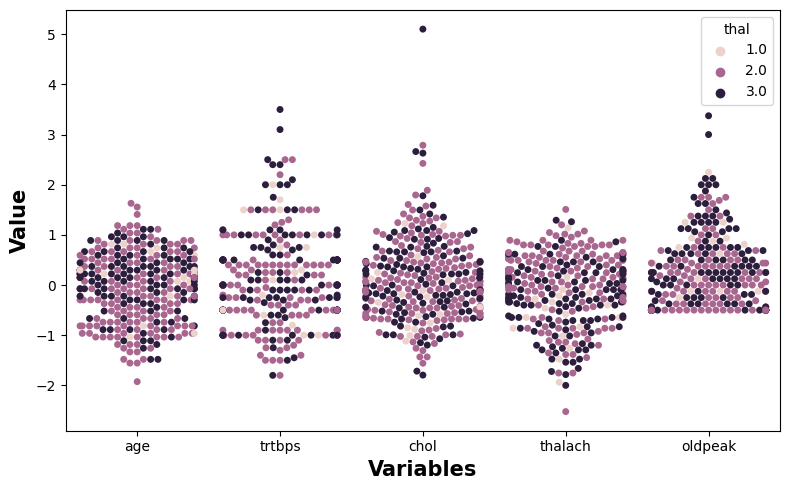

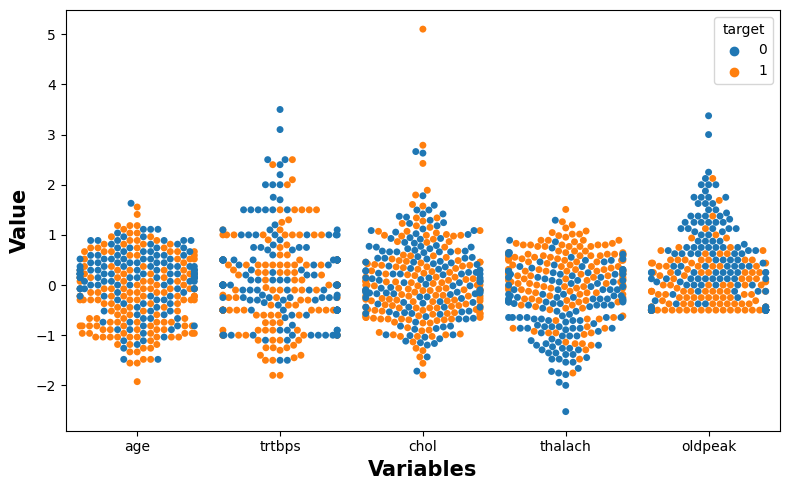

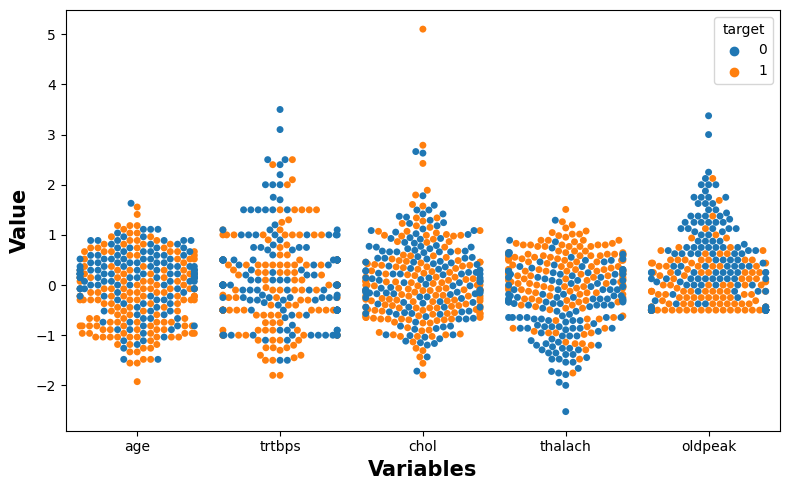

In [70]:
axis_font = {"family":"arial", "color":"black", "weight":"bold", "size": 15}


# visualize all numeric variables and all categorical variable except the target variable
for i in df[categorical_var]:
    df_new = pd.concat([df_scaled, df.loc[:,i]], axis =1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables",value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.swarmplot(x = "variables", y = "value",hue = i, data = melted_data)
    
    plt.xlabel("Variables", fontdict = axis_font)
    plt.ylabel("Value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

##### There are no really a strong correlation between the varibles above